# Cell Types Project
*Replace this with the name of your project*

## Team Member Names & Contributions - Group 3
- **Chloe Nguyen (A16794414)**: Responsible for data wrangling and importation, data visualization, and data analysis with relevant statistical tests
- **Amber Selstad (A16898643)**: 

## Abstract

*Fill in your 3-4 sentence abstract here*

## Research Question

How do the electrophysiological profiles of human neurons differ by depth (superficial versus deeper layers of the middle temporal gyrus, and how do their gene expression patterns also reflect these ephys differences and contribute to their overall endogenous electrical state?

# Background and Prior Work

*Fill in your background and prior work here (~500 words). You are welcome to use additional subheadings. You should also include a paragraph describing each dataset and how you'll be using them.* 

### Prior Work
A 2018 study by Song and Moyer explored the electrophysiological differences between layers 2/3 (L2/3) and layer 5 (L5) in the medial prefrontal cortex of rats[1]. Overall, they found that L2/3 neurons were less excitable and more hyperpolarized than L5 neurons, specifically testing electrophysiological features such as resting membrane potential(RMP), input resistance(Ri), threshold, and minimum current to reach threshold. 

### Anatomy and Function of Layers
To test the generalizability of Song and Moyer's results, we decided to test their findings in a different species model, humans, and a different brain region, the middle temporal gyrus (MTG). We are focusing on understanding how several electrophysiological features and the expression of related genes differ between layers 3 and 5 of the human MTG: Layer 3, also called the External Pyramidal Layer, consists of mostly pyramidal cells with outputs to the contralateral hemisphere of cortex, while Layer 5, also called the Internal Pyramidal Layer, consists of pyramidal cells with outputs to regions outside the cortex including subcortical structures.**[reference source]** 

### Defining Electrophysiological Properties
We chose to analyze four specific electrophysiological properties that relate to the excitabilty of a neuron: resting membrane potential(v_rest), input resistance(ri), threshold voltage after short square stimulus,(threshold_v_short_square), and the current amplitude of short square stimulus to reach threshold (threshold_i_short_square). A lowered resting membrane potential means the cell is hyperpolarized, thereby less excitable because it is harder to reach threshold. In accordance with Ohm's Law I = V/R, less excitable cells typically require an increased amplitude of stimulus current to compensate for the decreased input resistance and/or increased voltage threshold. Therefore, we will test if any or all of these features are significantly different between the L3 and L5 neurons. 

### Gene Expression
Once determining which electrophysiology features differ between L3 and L5 neurons, we will explore potential correlations between gene expression of K+ and Na+ channels, particualrly KCNQ1 and SCN8A respectively in L3 versus L5 MTG neurons. The natually high density of K+ ion channels across the membrane is a major contributor of the overall resting membrane potential of neurons, typically lowering voltage and excitability as K+ ions move down their electrochemical gradients out of the cell.[2] On the other hand, sodium channels usually allow positive Na+ influx into the cell for depolarization, thereby triggering action potentials.[2] We will analyze how gene expression data of this channels differs between L3 and L5 neurons to determine whether the correlation is consistent with the difference in excitability between these regions.

## Datasets
To address our research question, we will explore the Allen Brain Institute's Cell Types Database, as well as its RNA-Seq database. The Cell Types database is a powerful tool that harnesses electrical, morphological, and transcriptomic data of both human and mouse single cells. With this extensive platform, one could specify for a variety of cellular features such as the recorded neuron's location (which layer and/or which region), dendrite type, donor profile (age, sex, disease state), and more. For the scope of our project, we are most interested in extracting the electrophysiology response data for neurons after a series of whole-cell patch clamp recordings under varying current stimuli, specfically looking at those found in layer 3 and layer 5 of the MTG.

Furthermore, the RNA-Seq database also provides useful information about the molecular landscape of both human and mouse neurons, as this databank has the gene expression profiles from numerous RNA-sequencing experiments. Most transcriptomic data originate from human tissue samples obtained from different cortical structures, regions, and layers, thus enabling thorough analyses of gene expression patterns across neurons with diverse identities. We selected the Human Multiple Cortical Areas SMART-seq dataset recorded from 49,414 single nuclei, as it contained direct information for our desired L3 and L5 MTG neurons.

### References (include links):
(1) Song, C., & Moyer, J. R. (2018, January 1). Layer- and subregion-specific differences in the neurophysiological properties of rat medial prefrontal cortex pyramidal neurons. Journal of neurophysiology. https://pmc.ncbi.nlm.nih.gov/articles/PMC5866461/#ref-list1 

(2) Chen H, Chatelain FC, Lesage F. Altered and dynamic ion selectivity of K+ channels in cell development and excitability. Trends Pharmacol Sci. 2014 Sep;35(9):461-9. doi: 10.1016/j.tips.2014.06.002. Epub 2014 Jul 9. PMID: 25023607; PMCID: PMC4467785.

## Hypothesis


Based on previous research (Song & Moyer, 2018), as well as our understanding of neurobiology and how these electrophysiological properties relate to excitabilty, we hypothesize that when compared to L5 neurons, L3 neurons will have a lower v_rest, threshold_v_short_square, and ri, and higher threshold_i_short_square. In regards to their gene expression profiles, we also hypothesize that L3 neurons will show higher gene expression of KCNQ1 and lower gene expression of SCN8A in comparison to L5 neurons that contributes to their hyperpolarized/less excitable states.

## Setup

In [1]:
## This code imports packages essential for downstream data wrangling, analysis, manipulation, etc. Figures are plotted within the Jupyter notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

## Data Wrangling

Both datasets of interest for our project come from the Allen Brain Institute, specifically the Allen Cell Types website (https://celltypes.brain-map.org/data) and the Allen RNA-seq website (https://celltypes.brain-map.org/data). The Cell Types website provides a large-scale database of electrophysiological and morphogical features of  human and mouse cells, which we will utilize to filter for the samples needed to answer our research question.

The Allen Software Development Kit (AllenSDK) is a core package that facilitates reading and processing Allen Brain Institute data like the Cell Types one. First, once AllenSDK is installed, the 'CellTypesCache' module can extract and access the Cell Types database within a Python environment, while the 'CellTypesApi' module then enables us to query the database. After initalizing the cache to ctc, we can then begin filtering this data.

In [2]:
# Importing the Allen Cell Types database into Python
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# Creating a dataframe with only human cells
human_cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
human_df = pd.DataFrame(human_cells)

# Setting the index to the specimen id instead of arbitrary index values
human_df = human_df.set_index('id') 

# Showcasing the first 5 rows of this dataframe
human_df.head(5)

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,None,epilepsy,536912860,right,NaN
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,full,epilepsy,518641172,left,0.290951
596020931,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,full,tumor,595954915,left,0.497825


For the scope of our project, we are interested in comparing neurons found in layer 3 and layer 5 of the middle temporal gyrus, so we will continue to filter our datasets even further.

In [3]:
# Filtering for middle temporal gyrus neurons
human_df = human_df[human_df['structure_area_abbrev'] == 'MTG']

# Creating separate datasets for MTG layer 3 versus MTG layer 5 neurons
human_layer3 = human_df[human_df['structure_layer_name'] == '3']
human_layer5 = human_df[human_df['structure_layer_name'] == '5']

In [4]:
# Checking the dataframe to ensure it has the correct rows
human_layer3.head(5) 

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,full,epilepsy,518641172,left,0.290951
545608578,None,"[312.0, 280.0, 89.0]",Homo Sapiens,H16.03.010.13.06.01,3,12141,MTG,,spiny,intact,None,epilepsy,545510854,right,NaN
561467633,None,"[79.0, 273.0, 86.0]",Homo Sapiens,H16.06.013.12.08.05,3,12141,MTG,,spiny,truncated,None,epilepsy,561414332,left,NaN
530055374,None,"[70.0, 260.0, 111.0]",Homo Sapiens,H16.06.010.01.03.14.01,3,12141,MTG,,spiny,truncated,None,epilepsy,529678110,left,NaN
488418919,None,"[325.0, 261.0, 109.0]",Homo Sapiens,H15.06.017.03.04.01,3,12141,MTG,,spiny,intact,None,epilepsy,487502058,right,NaN


In [5]:
# Checking the dataframe to ensure it has the correct rows
human_layer5.head(5)

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
567776248,None,"[82.0, 272.0, 81.0]",Homo Sapiens,H17.06.003.12.06.03,5,12141,MTG,,spiny,truncated,None,epilepsy,567704703,left,NaN
527942865,None,"[67.0, 256.0, 110.0]",Homo Sapiens,H16.06.008.01.26.04,5,12141,MTG,,spiny,truncated,full,epilepsy,527747035,left,0.694466
508280385,None,"[325.0, 257.0, 102.0]",Homo Sapiens,H16.06.004.01.04.02,5,12141,MTG,,spiny,truncated,None,epilepsy,504921484,right,NaN
528042185,None,"[67.0, 256.0, 110.0]",Homo Sapiens,H16.06.008.01.20.05,5,12141,MTG,,spiny,truncated,full,epilepsy,527747035,left,0.533540


In [6]:
# Checking the number of cells in each database
print(len(human_layer3))
print(len(human_layer5))

163
68


After creating separate dataframes for our layer 3 versus layer 3 cortical cell data, we then need to import their corresponding electrophysiological data. This enables us to compare and contrast their behaviors given their different morphological features, especially layer 3 and 5 neurons are known to perform different functions and responses to inputs/stimuli. This can be done with the get_ephys_features function provided by the AllenSDK package.

In [7]:
ephys_features = ctc.get_ephys_features()
ephys_features = pd.DataFrame(ephys_features)
ephys_features = ephys_features.set_index('specimen_id') # Setting the index by specimen_id, similar to how the previous dataframes were set to 'id' 
print(ephys_features.columns)

Index(['adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'id', 'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'slow_trough_t_long_square', 'slow_trough_t_ramp',
       'slow_trough_t_short_square', 'slow_trough_v_long_square',
       'slow_trough_v_ramp', 'slow_trough_v_short_square', 'tau',
       'threshold_i_long_square', 'threshold_i_ramp',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_ramp', 'threshold_t_short_square',
       'threshold_v_long_square', 'threshold_v_ramp',
       'threshold_v_short_square

We then have to merge together our Layer 3 and Layer 5 neuron dataframes with their respective ephys data, doing so with the pandas 'join' with the default 'inner' function that will only merge entrices that appear in both dataframes.

In [8]:
human_3_ephys = human_layer3.join(ephys_features, how='inner')
human_5_ephys = human_layer5.join(ephys_features, how='inner')

In [9]:
human_3_ephys.head(5) # Checking the dataframe to ensure the merge was successful

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,...,9.962780,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661
545608578,None,"[312.0, 280.0, 89.0]",Homo Sapiens,H16.03.010.13.06.01,3,12141,MTG,,spiny,intact,...,22.069340,1.112633,-54.343754,-54.968751,-75.156258,3.675430,3.665890,3.586321,-78.500000,-74.496262
561467633,None,"[79.0, 273.0, 86.0]",Homo Sapiens,H16.06.013.12.08.05,3,12141,MTG,,spiny,truncated,...,6.479140,1.174147,-60.312504,-57.989586,-71.020838,4.149998,3.667004,3.929834,-78.312500,-69.626610
530055374,None,"[70.0, 260.0, 111.0]",Homo Sapiens,H16.06.010.01.03.14.01,3,12141,MTG,,spiny,truncated,...,19.934720,1.268865,-57.781254,-54.687503,-74.789068,3.522500,3.079748,3.442388,-82.687508,-74.551102
488418919,None,"[325.0, 261.0, 109.0]",Homo Sapiens,H15.06.017.03.04.01,3,12141,MTG,,spiny,intact,...,11.441047,1.261958,-54.562500,-56.125000,-72.131252,3.377114,3.535138,3.095895,-79.718750,-71.313972


In [10]:
human_5_ephys.head(5) # Checking the dataframe to ensure the merge was successful

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,...,NaN,1.051160,-67.468758,NaN,-70.875002,1.891881,NaN,1.989616,-101.000000,-69.209610
567776248,None,"[82.0, 272.0, 81.0]",Homo Sapiens,H17.06.003.12.06.03,5,12141,MTG,,spiny,truncated,...,2.006513,1.493430,-55.593750,-54.427087,-61.656254,3.107241,3.447558,3.314537,-94.468758,-59.619102
527942865,None,"[67.0, 256.0, 110.0]",Homo Sapiens,H16.06.008.01.26.04,5,12141,MTG,,spiny,truncated,...,4.221673,1.026132,-59.250004,-56.770837,-51.025002,3.906185,3.814117,3.756346,-82.593758,-67.725143
508280385,None,"[325.0, 257.0, 102.0]",Homo Sapiens,H16.06.004.01.04.02,5,12141,MTG,,spiny,truncated,...,4.870667,1.105107,-55.000000,-53.875004,-57.572919,5.038992,4.715647,4.458706,-80.843758,-66.651588
528042185,None,"[67.0, 256.0, 110.0]",Homo Sapiens,H16.06.008.01.20.05,5,12141,MTG,,spiny,truncated,...,3.443800,1.747470,-54.625000,-54.718754,-64.140631,3.200137,3.075722,3.355663,-84.718758,-64.250305


We can now begin to compare the two different neuron types by their electrophysiological data. Instead of comparing every single variable, we are choosing to compare a few key properties: resting membrane potential (vrest), input resistance (ri), minimum voltage threshold needed to trigger an action potential (threshold_v_short_square), and current needed to reach action potential threshold after a short square pulse (threshold_i_short_square). 

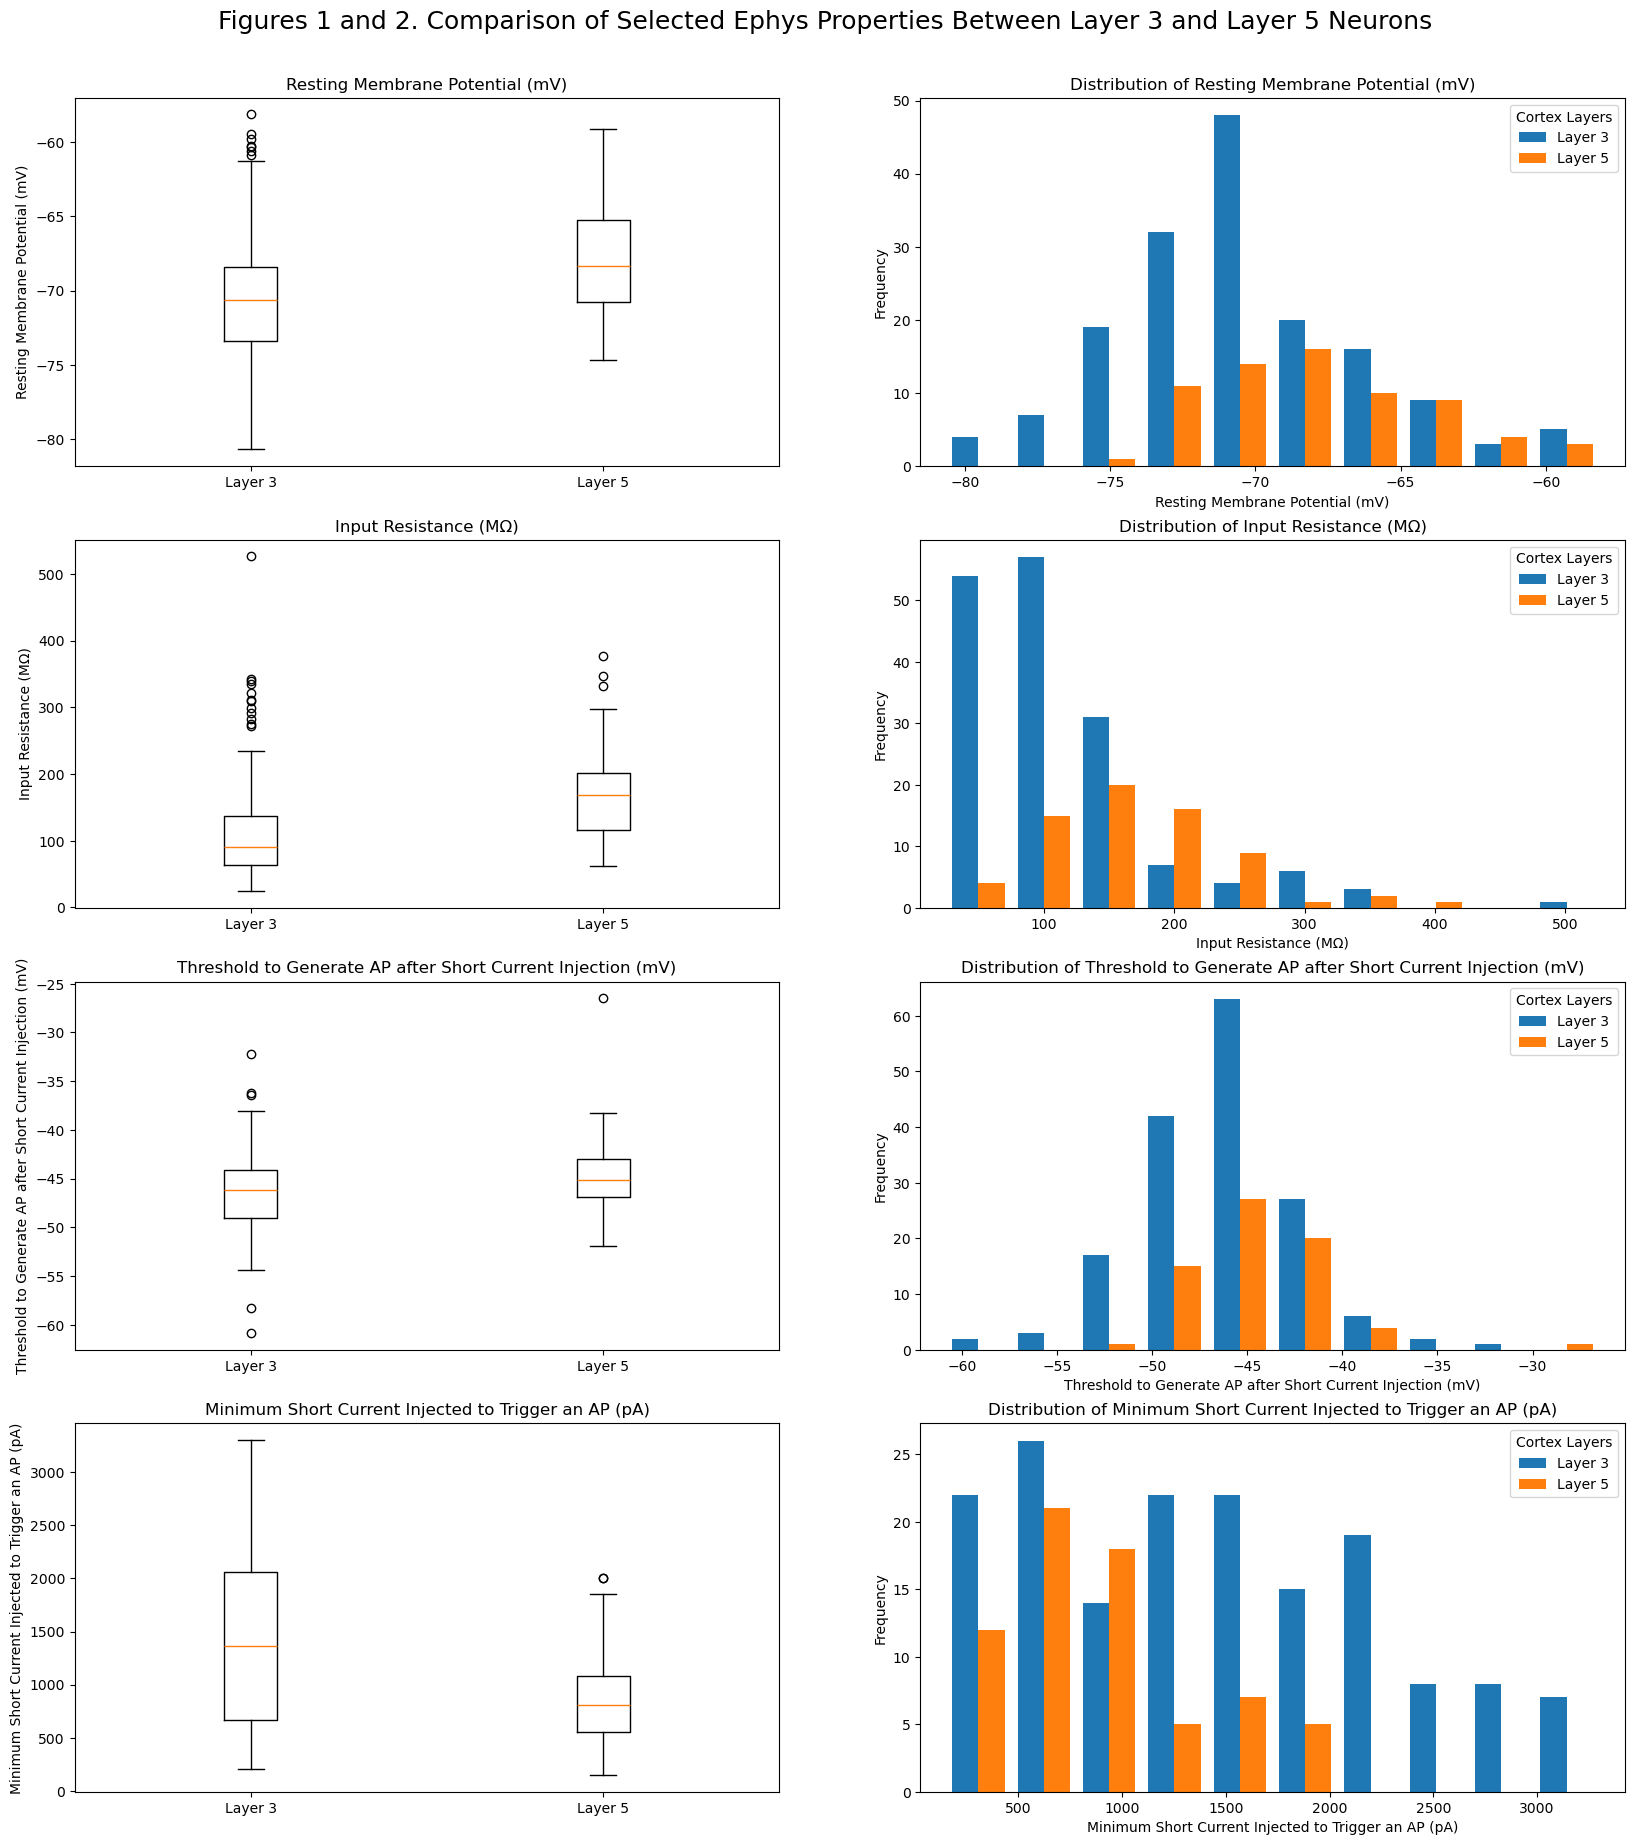

In [11]:
fig, ax = plt.subplots(4,2, figsize=(20,22))

# Creating a list of ephys properties that will be plotted
ephys_properties = ['vrest', 'ri', 'threshold_v_short_square', 'threshold_i_short_square']
ephys_feature_title = ['Resting Membrane Potential (mV)', 'Input Resistance (MΩ)', 'Threshold to Generate AP after Short Current Injection (mV)', 'Minimum Short Current Injected to Trigger an AP (pA)']

# Establishing an index for the downstream looping
index = 0

# Looping through each ephys property to make its own separate subplot in the entire figure
for item in ephys_properties:
    
    # Removing NaN values that might skew the data distribution and/or visualization
    layer3_ephys = human_3_ephys[item].dropna()
    layer5_ephys = human_5_ephys[item].dropna()
    
    # Plotting each property with its own x-axis and y-axis labels as a boxplot on the left column
    ax[index, 0].boxplot([layer3_ephys, layer5_ephys])
    ax[index, 0].set_xticks([1, 2]) 
    ax[index, 0].set_xticklabels(["Layer 3", "Layer 5"])
    ax[index, 0].set_ylabel(ephys_feature_title[index])
    ax[index, 0].set_title(f'{ephys_feature_title[index]}')

     # Plotting each property with its own x-axis and y-axis labels as a histogram on the right column
    ax[index, 1].hist([layer3_ephys, layer5_ephys], label=['Layer 3', 'Layer 5'])
    ax[index, 1].legend(title = "Cortex Layers")
    ax[index, 1].set_xlabel(f'{ephys_feature_title[index]}')
    ax[index, 1].set_ylabel('Frequency')
    ax[index, 1].set_title(f'Distribution of {ephys_feature_title[index]}')
    
    # After the first subplot is made, the loop will move to the next property
    index += 1 

# Adding an overarching figure title 
fig.suptitle("Figures 1 and 2. Comparison of Selected Ephys Properties Between Layer 3 and Layer 5 Neurons", fontsize=18,y=0.92)

plt.show()


Figure 1. The boxplots display the median (orange line) and interquartile range (Q1-Q3) for the distribution of each property for layer 3 and layer 5 neurons, with any outliers (circles) present outside of the whiskers. Given the results of Figure 1, it appears that there is similar overlap between layer 3 and layer 5 cortical neurons across all ephys properties, with the most visually different property being the minimum short current injection to trigger an AP (pA), or the 'threshold_i_short_square.' However, we will confirm any statistically signficant differences in the downstream data analysis/results section to make any solid conclusions. 

Figure 2. To see if our data follows a normal distribution pattern, we also want to analyze the histograms of the distributions for each ephys property, as this will help us determine what kind of statistical test to run to determine any significance between our ephys properties. 

Moving forward to the gene expression, we will also be using the Allen RNA-Seq data (https://celltypes.brain-map.org/rnaseq/search), which showcases the RNA transcriptomic expression in cells, such as which genes are expressed and how much. This could provide valuable insight on gene expression differences between Layer 3 and Layer 5 cortical neurons, such as genes involved in a neuron's electrophysiology like ion channels. The Allen Brain Institute unfortunately does not have a separate package to access RNA-Seq data, so we manually downloaded the Human Multiple Cortical Areas SMART-seq trimmed-means matrix (provides normalized gene expression) and corresponding metadata files directly into our notebook folders for data wrangling.

From our prior background research, we have identified candidate genes that previous research has implicated to be important in determining a neuron's electrophysiological state: KCNQ1 and SCN8A. 

In [113]:
# Uploading the metadata file that will help us sort for MTG neurons in layer 3 and layer 5
gene_metadata = pd.read_csv('metadata.csv')
gene_metadata = pd.DataFrame(gene_metadata)

# Filtering even further for samples in the MTG dataframe that are either from L3 or L5
layer3_genedf = gene_metadata[gene_metadata['cortical_layer_label'] == 'L3']
layer5_genedf = gene_metadata[gene_metadata['cortical_layer_label'] == 'L5']

# Checking to make sure the filters passed correctly
layer3_genedf.head(5)

,sample_name,exp_component_name,specimen_type,cluster_color,cluster_order,cluster_label,class_color,class_order,class_label,subclass_color,...,cell_type_alt_alias_order,cell_type_alt_alias_label,cell_type_designation_color,cell_type_designation_order,cell_type_designation_label,external_donor_name_color,external_donor_name_order,external_donor_name_label,outlier_call,outlier_type
0,F1S4_160721_035_B01,LS-15502_S34_E1-50,nucleus,#D97807,40.0,Inh L3-5 SST MAFB,#0066FF,4.0,GABAergic,#FFE500,...,40.0,NaN,#D97807,40.0,Neuron 040,#171799,3,H200.1030,False,NaN
1,F1S4_160721_035_C01,LS-15502_S35_E1-50,nucleus,#0E9797,67.0,Exc L3-4 RORB SEMA6D,#AFCC3D,2.0,Glutamatergic,#52FF26,...,67.0,NaN,#0E9797,67.0,Neuron 067,#171799,3,H200.1030,False,NaN
2,F1S4_160721_035_D01,LS-15502_S36_E1-50,nucleus,#29B948,65.0,Exc L3 RORB CARTPT,#AFCC3D,2.0,Glutamatergic,#52FF26,...,65.0,NaN,#29B948,65.0,Neuron 065,#171799,3,H200.1030,False,NaN
3,F1S4_160721_035_E01,LS-15502_S37_E1-50,nucleus,#D97807,40.0,Inh L3-5 SST MAFB,#0066FF,4.0,GABAergic,#FFE500,...,40.0,NaN,#D97807,40.0,Neuron 040,#171799,3,H200.1030,False,NaN
4,F1S4_160721_035_F01,LS-15502_S38_E1-50,nucleus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,#171799,3,H200.1030,True,Outlier L1-3 SST OR2AD1P


In [115]:
# Checking to make sure the filters passed correctly
layer5_genedf.head(5)

,sample_name,exp_component_name,specimen_type,cluster_color,cluster_order,cluster_label,class_color,class_order,class_label,subclass_color,...,cell_type_alt_alias_order,cell_type_alt_alias_label,cell_type_designation_color,cell_type_designation_order,cell_type_designation_label,external_donor_name_color,external_donor_name_order,external_donor_name_label,outlier_call,outlier_type
3812,F2S4_160113_039_B01,LS-15005h_S34_E1-50,nucleus,#945E51,5.0,Inh L1-6 LAMP5 CA13,#0066FF,4.0,GABAergic,#FF7373,...,5.0,Lamp5 Lhx6 1,#945E51,5.0,Neuron 005,#3DCC3D,2,H200.1025,False,NaN
3813,F2S4_160113_039_C01,LS-15005h_S35_E1-50,nucleus,#520DBB,90.0,Exc L5-6 THEMIS GPR21,#AFCC3D,2.0,Glutamatergic,#00CC14,...,90.0,NaN,#520DBB,90.0,Neuron 090,#3DCC3D,2,H200.1025,False,NaN
3814,F2S4_160113_039_D01,LS-15005h_S36_E1-50,nucleus,#E170FE,32.0,Inh L2-5 VIP TOX2,#0066FF,4.0,GABAergic,#996517,...,32.0,NaN,#E170FE,32.0,Neuron 032,#3DCC3D,2,H200.1025,False,NaN
3815,F2S4_160113_039_E01,LS-15005h_S37_E1-50,nucleus,#3DAD5E,107.0,Exc L5-6 FEZF2 MYBPHL,#AFCC3D,2.0,Glutamatergic,#006B99,...,107.0,NaN,#3DAD5E,107.0,Neuron 107,#3DCC3D,2,H200.1025,False,NaN
3816,F2S4_160113_039_F01,LS-15005h_S38_E1-50,nucleus,#60958B,84.0,Exc L4-5 RORB RPL31P31,#AFCC3D,2.0,Glutamatergic,#52FF26,...,84.0,NaN,#60958B,84.0,Neuron 084,#3DCC3D,2,H200.1025,False,NaN


Now that we have all the identifiers of cells within either layer 3 or layer 5 of the middle temporal gyrus, we will extract their transcriptomic data from the larger gene expression matrix provided by the Allen RNA-Seq portal. We specifically downloaded the trimmed-means.csv file that includes normalized gene expression for cell type clusters (see Readme.txt at https://portal.brain-map.org/atlases-and-data/rnaseq/human-multiple-cortical-areas-smart-seq for more detailed information), as the size of the file was easier to import and manage rather than the entire gene expression matrix that includes raw read counts of all exons and introns. This exon matrix file identifies cell types by their 'cluster_label', so we will use this information to filter the exon data for our Layer 3 and Layer 5 neurons of the middle temporal gyrus.

In [122]:
# Loading in the exon matrix using pandas and renaming the first column for clarity
gene_df = pd.read_csv('trimmed_means.csv')
gene_df = gene_df.rename(columns={gene_df.columns[0]: 'Gene Name'})
gene_df.head()

,Gene Name,Exc L5-6 FEZF2 ANKRD20A1,Exc L5-6 THEMIS TMEM233,Inh L1 LAMP5 NDNF,Exc L6 FEZF2 CPZ,Astro L1 FGFR3 MT1G,Exc L2-3 LINC00507 RPL9P17,Exc L6 FEZF2 KRT17,Exc L3-4 RORB FOLH1B,Endo L2-5 CLDN5,...,Exc L4 RORB CACNG5,Exc L6 FEZF2 FAM95C,Inh L1-3 VIP GGH,Exc L3-5 FEZF2 DCN,Exc L6 FEZF2 ETV4,Exc L5-6 FEZF2 RSAD2,Inh L1 ADARB2 DISP2,Inh L5-6 LAMP5 SFTA3,Exc L6 FEZF2 TBC1D26,Inh L4-5 PVALB TRIM67
0,3.8-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.8-1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8-1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.8-1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5-HT3C2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are some cluster labels (columns) that appear in both Layer 3 and Layer 5 dataframes, such as 'Inh L3-5 SST MAFB' that indicates the neuron is found from layer 3 to layer 5. We want to filter out any overlapping cell cluster types so that we can extract distinct L3 versus L5 data without including any cells located within both layer regions.

In [126]:
# Extracting the cell 'cluster_label' column from Layer 3 and Layer 5 dataframes and converting them into lists
layer3_cells = layer3_genedf['cluster_label'].tolist()
layer5_cells = layer5_genedf['cluster_label'].tolist()

# Converting each list to a set to find the common cluster labels 
common_labels = set(layer3_cells).intersection(set(layer5_cells))

# Removing any cluster labels found in both lists
layer3_distinct_cells = [label for label in layer3_cells if label not in common_labels]
layer5_distinct_cells = [label for label in layer5_cells if label not in common_labels]
print("Number of Neurons in Layer 3:", len(layer3_distinct_cells))
print("Number of Neurons in Layer 5:", len(layer5_distinct_cells))

Number of Neurons in Layer 3: 223
Number of Neurons in Layer 5: 887


Based on the list length for each dataframe, MTG L3 has 223 neuron samples whereas MTG L5 has 887 neuron samples from this Human Multiple Cortical Areas SMART-seq experiment that we can work with. We want to compare the normalized gene expression for our ion channels of interest: KCNQ1 and SCN8A. This requires using our previous filtered dataframes to sort the trimmed-means matrix for our samples of interest. Afterwards, we will create a boxplot to show the gene expression differences across the layer 3 and 5 cells for each gene.

In [129]:
# Sorting the gene_df (which stores the normalized gene expression values) for rows KCNQ1 and SCN8A
kcnq1_expression = gene_df[gene_df['Gene Name'] == 'KCNQ1']
scn8a_expression = gene_df[gene_df['Gene Name'] == 'SCN8A']
kcnq1_expression.head()

,Gene Name,Exc L5-6 FEZF2 ANKRD20A1,Exc L5-6 THEMIS TMEM233,Inh L1 LAMP5 NDNF,Exc L6 FEZF2 CPZ,Astro L1 FGFR3 MT1G,Exc L2-3 LINC00507 RPL9P17,Exc L6 FEZF2 KRT17,Exc L3-4 RORB FOLH1B,Endo L2-5 CLDN5,...,Exc L4 RORB CACNG5,Exc L6 FEZF2 FAM95C,Inh L1-3 VIP GGH,Exc L3-5 FEZF2 DCN,Exc L6 FEZF2 ETV4,Exc L5-6 FEZF2 RSAD2,Inh L1 ADARB2 DISP2,Inh L5-6 LAMP5 SFTA3,Exc L6 FEZF2 TBC1D26,Inh L4-5 PVALB TRIM67
11979,KCNQ1,0.069563,0.039733,0.130758,0.030787,0.0,0.050151,0.138728,1.313875,0.0,...,0.061235,0.053939,0.215704,1.707619,0.136289,0.272745,0.548571,0.203659,0.238525,0.161613


In [ ]:
scn8a_expression.he

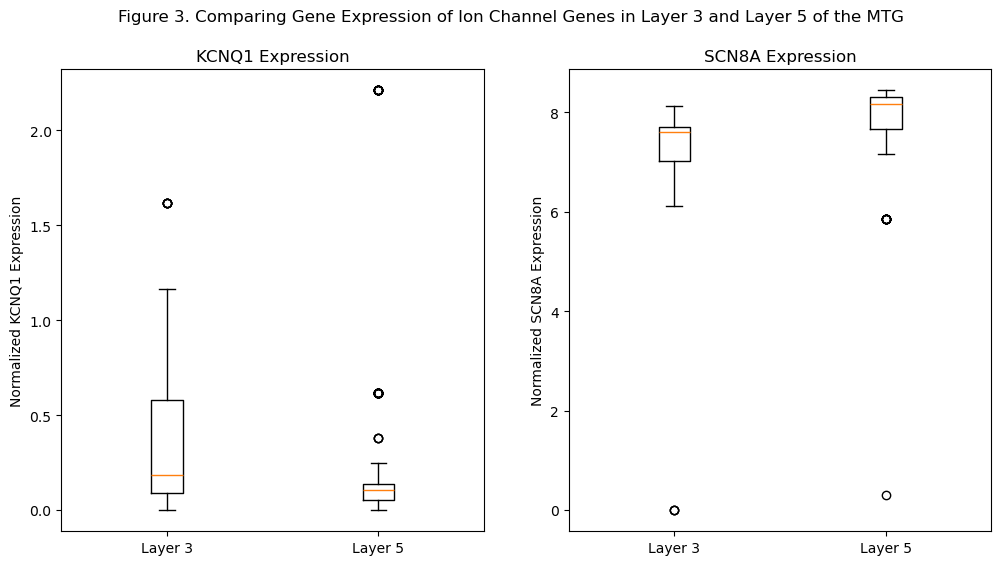

In [128]:
# Using the simplified KCNQ1 and SCN8A gene expression dataframes to filter only for cells present in Layer 3 and Layer 5 
# This sorts the gene expression matrix for rows containing the same 
kcnq1_layer3_expression = kcnq1_expression[layer3_distinct_cells].iloc[0] 
kcnq1_layer5_expression = kcnq1_expression[layer5_distinct_cells].iloc[0]

scn8a_layer3_expression = scn8a_expression[layer3_distinct_cells].iloc[0] 
scn8a_layer5_expression = scn8a_expression[layer5_distinct_cells].iloc[0]

plt.figure(figsize=(12, 6))

# Creating a boxplot showing KCNQ1 gene expression between Layer 3 and Layer 5 MTG neurons
plt.subplot(1, 2, 1)
plt.boxplot([kcnq1_layer3_expression, kcnq1_layer5_expression], labels=['Layer 3', 'Layer 5'])
plt.ylabel('Normalized KCNQ1 Expression')
plt.title('KCNQ1 Expression')

# Creating a boxplot showing SCN8A gene expression between Layer 3 and Layer 5 MTG neurons
plt.subplot(1, 2, 2)
plt.boxplot([scn8a_layer3_expression, scn8a_layer5_expression], labels=['Layer 3', 'Layer 5'])
plt.ylabel('Normalized SCN8A Expression')
plt.title('SCN8A Expression')

plt.suptitle('Figure 3. Comparing Gene Expression of Ion Channel Genes in Layer 3 and Layer 5 of the MTG')
plt.show()

Figure 3. The boxplots display the median (orange line) and interquartile range (Q1-Q3) for the differences in normalized gene expression for layer 3 versus layer 5 neurons.  From a visual standpoint, it looks like within the middle temporal gyrus, Layer 3 neurons express more KCNQ1 transcripts that will encode for potassium channels, but less SCN8A transcripts that will encode for sodium channels compared to Layer 5. This result will be analyzed further with statistical tests.

## Data Analysis & Results

Based on the shape of the histogram distribution, most of the ephys properties look slightly skewed leftward for both the layer 3 and layer 5 neurons, with the exception of the vrest property that looks like a bell curve for both layer types. However, we will conduct a Shapiro-Wilk test to confirm normality in our data before we begin to perform any statistcal tests, rather than relying on our visual approximations.

In [119]:
# Creating a list of the four ephys properties we have selected for comparison
ephys_properties = ['vrest', 'ri', 'threshold_v_short_square', 'threshold_i_short_square']

# Looping through each ephys property to perform a Shapiro-Wilk normality test
for item in ephys_properties:

    # Removing NaN values that might skew the data distribution in both dataframes
    layer3_data = human_3_ephys[item].dropna()
    layer5_data = human_5_ephys[item].dropna()
    
    # Using the stats package that contains the shaprio test to determine normality 
    stat, p_value = stats.shapiro(layer3_data)
    print(f"p-value for {item} in Layer 3:", p_value)

    # Using the stats package that contains the shaprio test to determine normality 
    stat, p_value = stats.shapiro(layer5_data)
    print(f"p-value for {item} in Layer 5:", p_value)

p-value for vrest in Layer 3: 0.0157233327627182
p-value for vrest in Layer 5: 0.06543377786874771
p-value for ri in Layer 3: 5.81066770220795e-13
p-value for ri in Layer 5: 0.015782978385686874
p-value for threshold_v_short_square in Layer 3: 0.0589764378964901
p-value for threshold_v_short_square in Layer 5: 2.0690740711870603e-05
p-value for threshold_i_short_square in Layer 3: 2.249818862765096e-05
p-value for threshold_i_short_square in Layer 5: 0.0010666233720257878


If the p-value exceeds 0.05 in the Shapiro-Wilk test, the data should follow a normal distribution pattern; otherwise, it is considered not normal. The results indicate that only the distribution of the layer 5 resting membrane potential (vrest), and the distribution of the layer 3 voltage threshold for an AP (threshold_v_short_square) are normal. However, since the corresponding data for the other layer does not follow a normal distribution pattern, we want to perform a Mann-Whitney U test to measure statistical signficance of our two independent cell populations instead of a standard t-test.

In [120]:
ephys_properties = ['vrest', 'ri', 'threshold_v_short_square', 'threshold_i_short_square']

# Looping through each ephys property to perform a Mann-Whitney U test similar to before
for item in ephys_properties:

    # Removing NaN values that might skew the data distribution in both dataframes
    layer3_data = human_3_ephys[item].dropna()
    layer5_data = human_5_ephys[item].dropna()
        
    # Using the stats package with the built-in Mann-Whitney U test to test signficance between Layer 3 and Layer 5 neurons for each ephys property
    stat, p_value = stats.mannwhitneyu(layer3_data, layer5_data)
    print(f'Test for {item}:')
    print(f'P-value: {p_value}')

    # Checking if the p-value is significant (p < 0.05)
    if p_value < 0.05:
        print(f'{item}: P-value is less than 0.05, therefore the difference is significant')
    else:
        print(f'{item}: P-value is greater than 0.05, therefore the difference is not significant.')

Test for vrest:
P-value: 2.5628503630726782e-05
vrest: P-value is less than 0.05, therefore the difference is significant
Test for ri:
P-value: 7.793551601417036e-10
ri: P-value is less than 0.05, therefore the difference is significant
Test for threshold_v_short_square:
P-value: 0.010024401972948209
threshold_v_short_square: P-value is less than 0.05, therefore the difference is significant
Test for threshold_i_short_square:
P-value: 1.0584866176184332e-05
threshold_i_short_square: P-value is less than 0.05, therefore the difference is significant


We can conclude that for all four of our ephys properties of interest, there is a statistically significant difference between Layer 3 and Layer 5 cortical neurons, which does match Song and Moyer's previous studies performed in rodent medial prefrontal cortexes.

We also will perform a Mann-Whitney U test for our gene expression results to see if there is a statistically significant difference in the KCNQ1 and SCN8A expression patterns between MTG Layer 3 and Layer 5 neurons, 

In [121]:
# Using the stats package with the built-in Mann-Whitney U test to test signficance between Layer 3 and Layer 5 neurons for each ephys property

kcnq1_layer3 = kcnq1_layer3_expression.mean()
print(kcnq1_layer3)
kcnq1_layer5 = kcnq1_layer5_expression.mean()
print(kcnq1_layer5)

scn8a_layer3 = scn8a_layer3_expression.mean()
print(scn8a_layer3)
scn8a_layer5 = scn8a_layer5_expression.mean()
print(scn8a_layer5)

#KCNQ1
KCQN1_stat, KCNQ1_p_value = stats.mannwhitneyu(kcnq1_layer3_expression, kcnq1_layer5_expression)
print("The p-value for KCNQ1 expression is:", KCNQ1_p_value)

#SCN8A
SCN8A_stat, SCN8A_p_value = stats.mannwhitneyu(scn8a_layer3_expression, scn8a_layer5_expression)
print("The p-value for SCN8A expression is:", SCN8A_p_value)

# Check for significance and print results
if KCNQ1_p_value < 0.05:
    print("KCNQ1 P-value is less than 0.05, therefore the difference is significant")
else:
    print("KCNQ1 P-value is greater than 0.05, therefore the difference is not significant")

if SCN8A_p_value < 0.05:
    print("SCN8A P-value is less than 0.05, therefore the difference is significant")
else:
    print("SCN8A P-value is greater than 0.05, therefore the difference is not significant")


0.41127228934080723
0.15500775245659526
7.338593103139013
8.015536724836528
The p-value for KCNQ1 expression is: 4.482198700761183e-16
The p-value for SCN8A expression is: 3.3408965705256477e-60
KCNQ1 P-value is less than 0.05, therefore the difference is significant
SCN8A P-value is less than 0.05, therefore the difference is significant


We can also conclude that both KCNQ1 and SCN8A gene expression differs signficantly between the two layer neuron types. Judging by the mean gene expression values, KCNQ1 is higher in Layer 3 neurons, but SCN8A is higher in Layer 5 neurons.

## Conclusion & Discussion

*Fill in your discussion information here*